In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the pre-trained MobileNetV2 model trained on COCO
model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=True)

def load_and_prepare_image(img_path):
    """
    Load an image file and prepare it for classification/detection.
    :param img_path: Path to the image file.
    :return: A processed image ready for classification/detection.
    """
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def detect_and_visualize(model, img_path):
    """
    Detect objects in an image using the provided pre-trained model and visualize results.
    :param model: Pre-trained MobileNetV2 model.
    :param img_path: Path to the image file.
    """
    # Load and prepare image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_image = load_and_prepare_image(img_path)

    # Predict
    preds = model.predict(processed_image)
    predictions = decode_predictions(preds, top=3)[0]

    # Visualize
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')

    for pred in predictions:
        # Print predictions
        print(f'Predicted: {pred[1]}, probability: {pred[2]:.5f}')

        # Drawing text and boxes requires knowing the positions, handled by object detection models
        # Since MobileNetV2 is not an object detection model, we cannot draw boxes directly
        plt.text(10, 20, f'{pred[1]}: {pred[2]:.2f}', color='red', fontsize=12, backgroundcolor='white')

    plt.show()


1/1 [==============================] - 0s 55ms/step
Predicted: tabby, probability: 0.62305
Predicted: tiger_cat, probability: 0.19941
Predicted: Egyptian_cat, probability: 0.05616


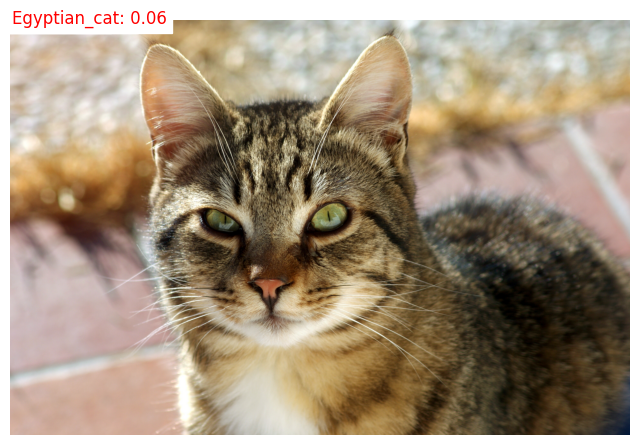

In [5]:
# Specify the path to your image
img_path = '/content/A-Cat.jpg'  # Replace with the path to your image file

# Detect objects and visualize
detect_and_visualize(model, img_path)

1/1 [==============================] - 0s 97ms/step
Predicted: dingo, probability: 0.41787
Predicted: basenji, probability: 0.11999
Predicted: red_fox, probability: 0.08878


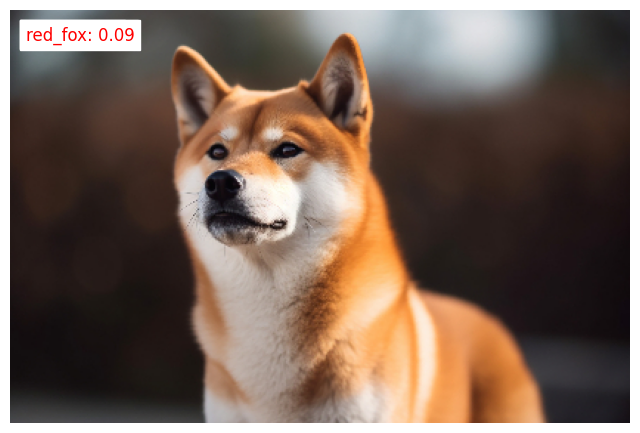

In [12]:
# Specify the path to your image
img_path = '/content/img1.jpg'  # Replace with the path to your image file

# Detect objects and visualize
detect_and_visualize(model, img_path)